**Movies Analysis for MicroSoft Movie Studio**

**1 Business Problem**

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. 
They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. 
They have hired you to help them better understand the movie industry.
Your team is charged with exploring what type of films are currently doing the best at the box office. 
You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

**1.1 Introduction**

In order to help Microsoft make an informed decision about entering the movie creation industry, movie data from various  sources, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers have been provided. Through analysis, we aim to answer several key questions:
1. Which movie genre is the most profitable?
2. Is there a correlation between movie budget and profitability? Are high-budget movies more profitable compared to low-budget ones?
3. Which movie genre is the most popular among audiences?
4. Among other studios, which movie genre is the most popular?
By analyzing this data, we hope to provide insights and recommendations that will help Microsoft make an informed decision about entering the movie creation industry.

The data analysis process involved utilizing popular Python libraries such as pandas, numpy, and matplotlib. SQL was also employed to access data from the IMDb database.Data also was merged from various sources provided. Different types of visualizations including bar charts, scatter plots, box plots, and line graphs were used to effectively represent the analyzed data


**2 Data Preparation and Analysis**

**2.1 Assessing the data**

In [1]:

#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline



In [5]:
#connecting to sql
import sqlite3
# Connect to the SQLite database using file path
conn = sqlite3.connect('zippedData/im.db/im.db')
cursor = conn.cursor()
# Fetch the names of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
# Print the table names
for table in tables:
    print(table[0])
# List of table names from sql database
table_names = ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']

# Iterate through the table names and save them to Excel files
for table_name in table_names:
    # Read data from SQLite table into a DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 1048575", conn) # Limit to 1,048,575 rows max supported by excel
    # Save the DataFrame to an Excel file
    df.to_excel(f"{table_name}.xlsx", index=False)
#Data from imdb was in database hence for easier accessibility I connected to the database and downloaded data to excel format and converted to csv

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [6]:
#closing database connection
conn.close()

In [2]:
#Loading data to DataFrame:bom, tmdb, tn.(CSV format)
tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz", compression='gzip')
tn_movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", compression='gzip', )
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')

#Loading data to DataFrame rt files (TSV format)
rt_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t', compression='gzip')
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', compression='gzip', encoding='unicode_escape')

#Loading data to DataFrame imdb files (CSV format)
imdb_basics = pd.read_csv("zippedData\imdb_basics.csv.gz")




   **2.2 The Most profitable Genre**




In [3]:

# Converting columns to numeric format
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculating total gross revenue
tn_movie_budgets['total_gross'] = tn_movie_budgets['domestic_gross'] + tn_movie_budgets['worldwide_gross']

# Calculate profit
tn_movie_budgets['profit'] = tn_movie_budgets['total_gross'] - tn_movie_budgets['production_budget']



In [6]:

# Merge the two datasets on "primary_title" and "movie" columns
movie_genre_df = pd.merge(tn_movie_budgets, imdb_basics, how='left', left_on=['movie'], right_on=['original_title'])

# Drop unnecessary columns from merged_df
movie_genre_df .drop(['tconst', 'original_title'], axis=1, inplace=True)

# Print the updated dataframe first 5
movie_genre_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,primary_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09,NaN,NaN,NaN,NaN


In [7]:
#droping missing values in genre since the movie genre is object cannot be filled with mode or mean
# missing values also do not have an impact in the analysis

movie_genre_df.dropna(subset=['genres'], inplace=True)


Text(0.5, 1.0, 'Profit by Genre')

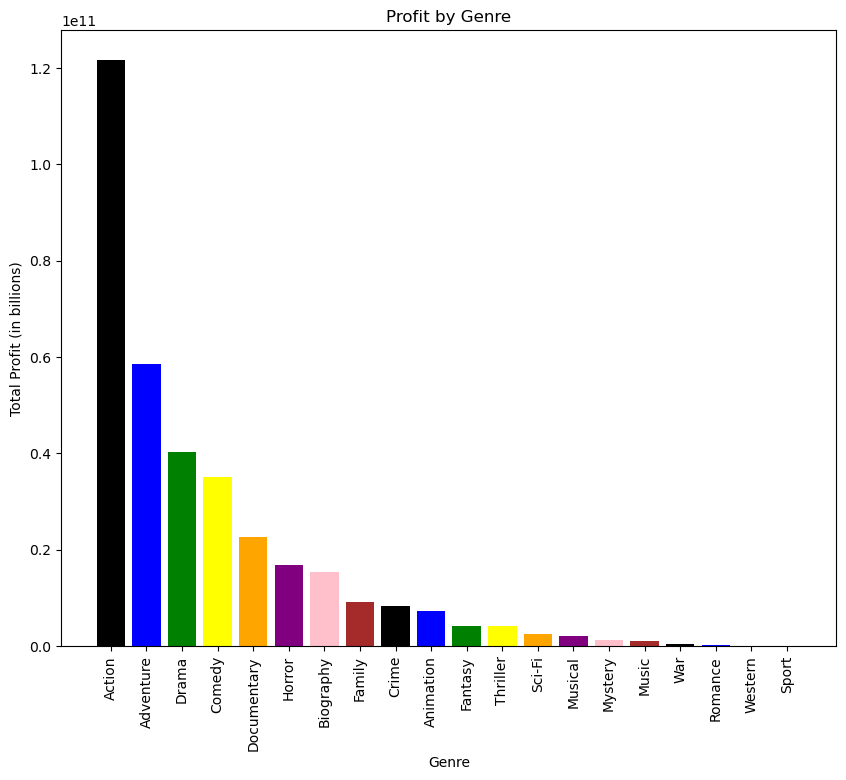

In [8]:

# Split genres by commas and select the first genre name as the representative genre
movie_genre_df ['genre'] = movie_genre_df ['genres'].str.split(',', expand=True)[0]

# Group data by genre and calculate sum of profits
genre_profit = movie_genre_df .groupby('genre')['profit'].sum().reset_index()

# Sort genres by profit in descending order
genre_profit.sort_values(by='profit', ascending=False, inplace=True)

#Create a list of colors for each genre
colors = ['black', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown']

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(genre_profit['genre'], genre_profit['profit'], color=colors)
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Total Profit (in billions)')
plt.title('Profit by Genre')



**Observation**

Based on the analysis, the top 5 movie genres that tend to generate higher profits are action, adventure, drama, comedy, and documentaries. It's important to note that this analysis assumes that each movie has only one genre, and the first genre listed in the provided data is used for analysis. However, it's worth mentioning that some movies have multiple genres.

**2.3 Profit Vs Production_Budget**



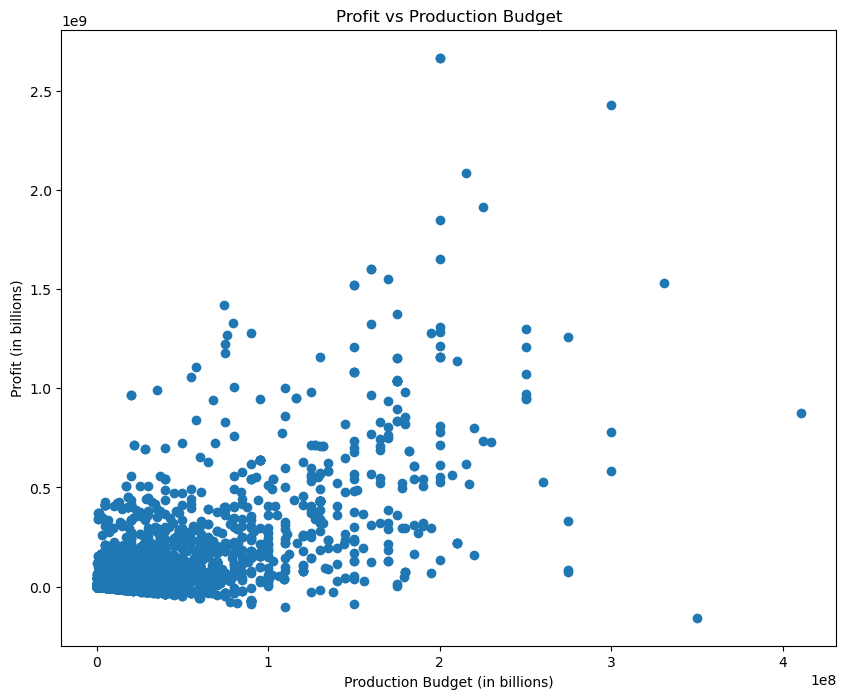

In [9]:

# Convert production_budget to numeric
movie_genre_df ['production_budget'] = movie_genre_df ['production_budget'].replace('[\$,]', '', regex=True).astype(float)

# Plot profit vs budget
plt.figure(figsize=(10, 8))
plt.scatter(movie_genre_df ['production_budget'],movie_genre_df ['profit'])
plt.xlabel('Production Budget (in billions)')
plt.ylabel('Profit (in billions)')
plt.title('Profit vs Production Budget')
plt.show()


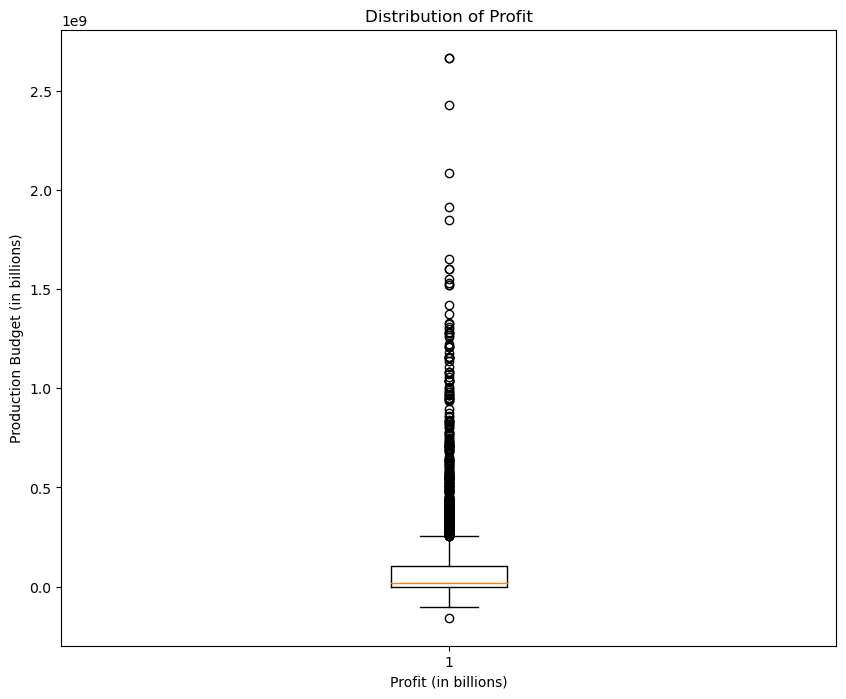

In [10]:


# Create box plot
plt.figure(figsize=(10, 8))
plt.boxplot(movie_genre_df['profit'], vert=True)
plt.xlabel('Profit (in billions)')
plt.ylabel('Production Budget (in billions)')
plt.title('Distribution of Profit')
plt.show()



**Observation**

The analysis of profits and production budgets in the movie industry shows that some movies with lower budgets may have higher profits compared to movies with higher budgets and, some high budget movies have low profits. indicating the presence of potential outliers and other factors influencing profitability. Further analysis and additional data, including a larger sample size and consideration of variables such as marketing efforts, may be necessary to draw conclusive insights. Collecting data on various financial metrics and considering a wider range of movies across different budgets, genres, could provide a more comprehensive understanding of the relationship between production budgets and profits in the movie industry.

**2.4 Genre Profitability over the Years**

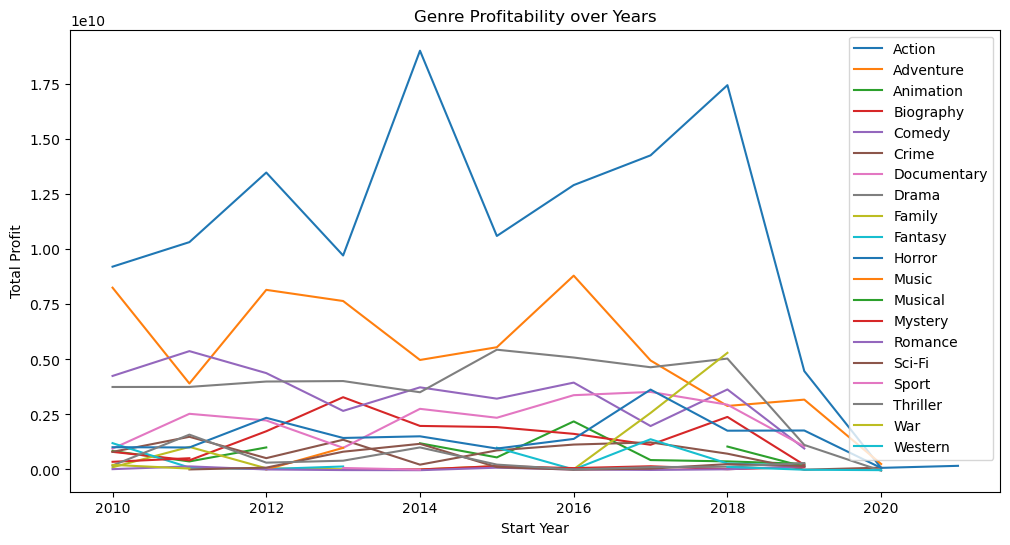

In [11]:
# Group by start_year and genre, and calculate the total profit for each group
genre_profitability = movie_genre_df.groupby(['start_year', 'genre'])['profit'].sum().reset_index()

# Pivot the DataFrame to have genres as columns
genre_profitability_pivot = genre_profitability.pivot(index='start_year', columns='genre', values='profit')

# Plot the genre profitability over start years using a line plot
plt.figure(figsize=(12,6))
genre_profitability_pivot.plot(kind='line', ax=plt.gca())
plt.title('Genre Profitability over Years')
plt.xlabel('Start Year')
plt.ylabel('Total Profit')
plt.legend(loc='upper right')
plt.show()

**Observation**

Based on the analysis, it is evident that action and adventure movies have consistently ranked among the most profitable genres since 2010. These genres have consistently shown strong financial performance, indicating their popularity among audiences and their potential for generating high profits for movie studios.

**2.5 Genre Popularity**

In [12]:
imdb_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
tmdb_movies.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:

# Extract relevant columns from IMDb basics dataset
imdb_basics = imdb_basics[['primary_title', 'genres']]

# Merge IMDb basics and TMDB movies datasets based on title columns
Genres_popularity_df = tmdb_movies.merge(imdb_basics, how='left', left_on='original_title', right_on='primary_title')

# Drop unnecessary columns from the merged dataset
Genres_popularity_df = Genres_popularity_df.drop(['primary_title'], axis=1)

# Display the first 5 rows of the merged dataset
Genres_popularity_df.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"Adventure,Fantasy,Mystery"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"Action,Adventure,Animation"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"Action,Adventure,Sci-Fi"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,NaN
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"Action,Adventure,Sci-Fi"


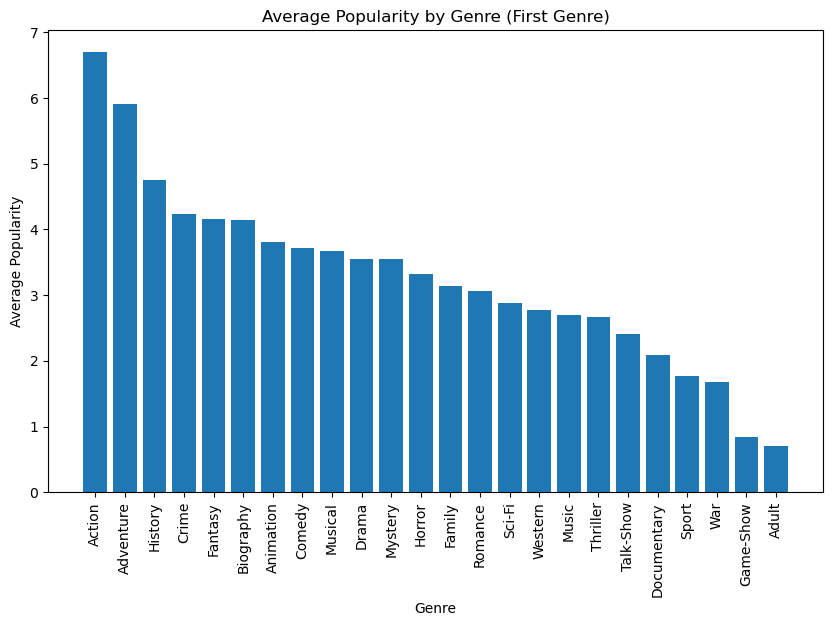

In [15]:

# Extract the first genre from the genres column
Genres_popularity_df['genre'] = Genres_popularity_df['genres'].str.split(',').str[0]

# Group by genre and calculate the mean popularity
genre_popularity = Genres_popularity_df.groupby('genre')['popularity'].mean().reset_index()

# Sort by popularity in descending order
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

# Plot the genre popularity using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(genre_popularity['genre'], genre_popularity['popularity'])
plt.title('Average Popularity by Genre (First Genre)')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()



**Observation**

Based on the analysis, the top 5 most popular movie genres among viewers are action, adventure, history, crime, and fantasy. These genres have consistently garnered high levels of popularity and viewership, indicating a strong audience interest in these types of movies. This finding suggests that movies belonging to these genres tend to attract a larger audience and generate higher levels of viewer engagement.

**2.6 Genre Popularity Among Studios**

In [17]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [57]:
imdb_basics.head()

,primary_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [18]:
# Merge the datasets on "title" and "primary_title"
merged_df = bom.merge(imdb_basics, left_on='title', right_on='primary_title')

# Drop unnecessary columns from the merged dataset
merged_df.drop(['primary_title'], axis=1, inplace=True)

# Display the merged dataset
merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,"Action,Adventure,Sci-Fi"


In [19]:
df = pd.DataFrame(merged_df)

# Select only the 'title', 'studio', and 'genres' columns
merged_df = df[['title', 'studio', 'genres']]

# Print the resulting dataframe
merged_df.head()


,title,studio,genres
0,Toy Story 3,BV,"Adventure,Animation,Comedy"
1,Inception,WB,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,"Action,Adventure,Sci-Fi"


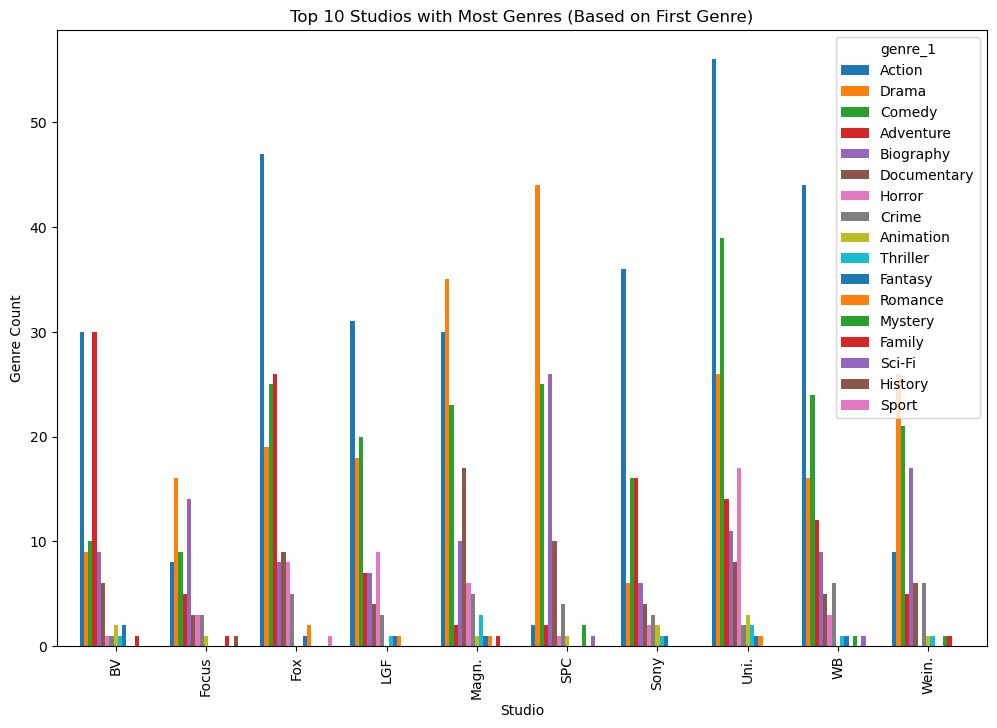

In [20]:


# Extract the first genre from the "genres" column
df['genre_1'] = df['genres'].str.split(',').str[0]

# Count the occurrences of each genre for each studio
df_genre_counts = df.groupby(['studio', 'genre_1']).size().reset_index(name='count')

# Sort the dataframe by the count of unique genres in descending order
df_sorted = df_genre_counts.groupby('studio').size().sort_values(ascending=False)

# Get the top 10 studios with the most number of genres
top_10_studios = df_sorted.head(10)

# Filter the genre counts dataframe to include only the top 10 studios
df_top_10_studios = df_genre_counts[df_genre_counts['studio'].isin(top_10_studios.index)]

# Pivot the dataframe to have genres as columns and genre counts as values
df_pivot = df_top_10_studios.pivot(index='studio', columns='genre_1', values='count')

# Sort the columns by the total count of each genre in descending order
df_pivot = df_pivot[df_pivot.sum().sort_values(ascending=False).index]

# Convert the stacked bar chart to a multibar chart
ax = df_pivot.plot(kind='bar', figsize=(12, 8), width=0.8)

# Set the x-axis label and title
ax.set_xlabel('Studio')
ax.set_ylabel('Genre Count')
ax.set_title('Top 10 Studios with Most Genres (Based on First Genre)')

# Show the plot
plt.show()


**Observation**

Analyzing the data from the 10 studios, it is evident that half of the studios have a preference for action movies as their favorite genre, followed by drama. This finding suggests that action movies are a popular choice among studios, possibly due to their potential in revenues and audience engagement. Drama genre also appears to be a popular choice among studios, indicating a diverse range of genre preferences among the analyzed studios.

**Conclusion**

Based on the analysis, action and adventure movies have consistently shown higher profitability and popularity among viewers. Drama, comedy, and documentaries also have potential for profitability. Therefore, Microsoft may consider investing in these genres for higher revenues. However, further analysis could be done to understand the impact of other variables such as marketing efforts, release timing, and target audience demographics.